**Dimensionality Reduction **

## **Dimensionality Reduction**

Dimenionality reduction for me is the process of simplifying complex data by 
reducing the number of features or variables while retaining the important information. 
If I simplyfy it more, I can say it is a means to look at same picture from 
different dimensions, and then select the dimension that gives the perfect view where all the data is there and can be easily identified. 

---


Let me explain, this in more simpler terms, through a daily life example. 
Suppose you have a 1000 photographs and you want them to classify them and prepare different sets for each. You are classifying the photographs based on common themes or visual patterns. But there is another way in which you can group on the basis of categories or themes, making it easier to analyze and understand.


---
In a similar manner, dimensionality reduction techniques take a complex dataset with numerous features and transform it into a lower-dimensional representation.
It simplifies the data, making it more manageable and allowing for better visualization, analysis, and decision-making.

---
In this notebook I am going to cover some techniques for dimensionality reduction with intution behind it:-


1. PCA
2. LDA
3. NMF


# PCA (Principal Component Analysis)
I am adding two links which will give you very good intution behind this algorithms.
1.https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579
2.https://www.youtube.com/watch?v=iRbsBi5W0-c
 

Before moving forward there are certain terms which I would like to explain certain terms such as Eigen values, Eigen vectors and covariance matrix.
For that refer:-
->https://byjus.com/maths/eigen-values/
->https://byjus.com/covariance-matrix-formula/#:~:text=Covariance%20Matrix%20is%20a%20measure,matrix%20and%20variance%2Dcovariance%20matrix.



# Preparing our own PCA Class
Steps:-
1. Mean Centering
2. Find the Covariance Matrix among all the columns
3. Find eigen values/eigen Vectors by eigen decomposing covariance matrix
4. Now transform all the data points.

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(23)

# creating data for group 1 
v1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
sample1=np.random.multivariate_normal(v1,cov_mat1,20)
df=pd.DataFrame(sample1,columns=['f1','f2','f3'])
df['target']=1


# creating data for group 2
v2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
sample1=np.random.multivariate_normal(v2,cov_mat2,20)
df1=pd.DataFrame(sample1,columns=['f1','f2','f3'])
df1['target']=0

In [ ]:
df=df.append(df1,ignore_index=True)

<ipython-input-16-dc5f149d3fb3>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df=df.sample(40)

In [ ]:
import plotly.express as px
fig=px.scatter_3d(df,x=df['f1'],y=df['f2'],z=df['f3'],color=df['target'].astype('str'))
fig.show()


In [ ]:
# step 1: Mean Centering
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [ ]:
#step2:-creating covariance matrix
cov_mat=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print ("Covariance Matrix",cov_mat)

Covariance Matrix [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [ ]:
#step 3 :- get the eigen values and eigen matrix- doing eigen decomposing on cov matrix
eig_values, eig_vectors=np.linalg.eig(cov_mat)

In [ ]:
eig_values # since we have 3 features we will have 3 eigen values

array([1.3536065 , 0.94557084, 0.77774573])

In [ ]:
eig_vectors# we have 3 eigen vectors as 3 values of eigen values are there for all 3 features

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [ ]:
pc=eig_vectors[0:2]

In [ ]:
# transforing using 2 principal components 
trsf_df=np.dot(df.iloc[:,0:3],pc.T)
df2=pd.DataFrame(trsf_df,columns=['PC1','PC2'])
df2['target']=df['target'].values
df2

PC1       PC2  target
0   0.599433  1.795862       1
1   1.056919 -0.212737       0
2  -0.271876  0.498222       1
3  -0.621586  0.023110       1
4   1.567286  1.730967       1
5  -1.320157 -0.257002       0
6  -0.470834 -1.373121       0
7  -0.401542  1.203061       1
8  -0.433734  1.153326       0
9   0.227326 -2.669841       0
10  1.007007  0.596022       0
11  1.726114  0.492511       1
12 -0.429384  0.829265       1
13  0.886733  0.522664       1
14 -0.872205  0.530675       0
15 -3.367715 -0.254627       0
16  0.688605  0.658084       1
17 -0.478444  0.774372       1
18  1.304549  0.476645       1
19 -0.729043 -0.846506       0
20 -0.069178 -0.130994       0
21  0.484802 -1.217708       0
22  1.058221 -0.452026       0
23  0.741715  1.023822       1
24  0.202775  0.091815       0
25 -0.757890 -2.422615       0
26 -0.138331 -0.368372       0
27 -0.220797 -1.441911       0
28 -1.124520  0.842226       1
29 -0.434777 -0.603836       1
30  0.232113 -1.153250       0
31  1.464336 -1.510939       0
32 -1.348823 -0.536119       0
33 -0.278732 -0.447581       1
34  1.631677  1.894527       1
35 -0.144559  0.494895       1
36  0.623953  0.088371       1
37 -0.997408  0.778938       1
38 -0.497476  0.161370       0
39 -0.094556 -0.761566       1

In [ ]:
import plotly.express as px
fig=px.scatter(df2,x=df2['PC1'],y=df2['PC2'],color=df2['target'].astype('str'))
fig.show()


#Implementing PCA using MNIST DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
m_df=pd.read_csv("train.csv")

In [ ]:
m_df

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [ ]:
m_df=m_df.fillna(0)

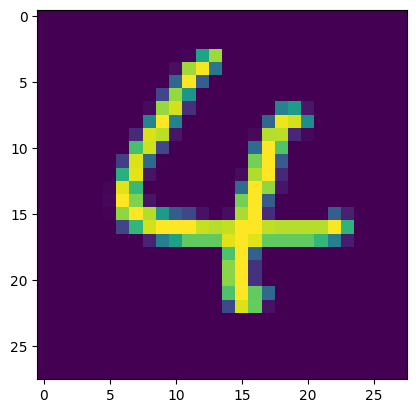

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(m_df.iloc[13912,1:].values.reshape(28,28))

In [ ]:
x=m_df.iloc[:,1:]
y=m_df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(33600, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.9648809523809524

APPLYING PCA


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train1=scaler.fit_transform(x_train)
x_test1=scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [ ]:
x_train1=pca.fit_transform(x_train1)
x_test1=pca.transform(x_test1)

In [ ]:
x_train1.shape

(33600, 100)

In [ ]:
knn1=KNeighborsClassifier()

In [ ]:
knn1.fit(x_train1,y_train)

KNeighborsClassifier()

In [ ]:
y_pred1=knn1.predict(x_test1)

In [ ]:
accuracy_score(y_test,y_pred1)

0.954047619047619

In [ ]:
# plotting it in 2 D and 3 D

pca=PCA(n_components=2)
x_train1=pca.fit_transform(x_train1)
x_test1=pca.transform(x_test1)

In [ ]:
import plotly.express as px
fig=px.scatter(x=x_train1[:,0],y=x_train1[:,1],color=y_train.astype('str'))
fig.show()


In [ ]:
x_train1=scaler.fit_transform(x_train)
x_test1=scaler.transform(x_test)
pca=PCA(n_components=3)
x_train1=pca.fit_transform(x_train1)
x_test1=pca.transform(x_test1)
import plotly.express as px
fig=px.scatter_3d(x=x_train1[:,0],y=x_train1[:,1],z=x_train1[:,2],color=y_train.astype('str'))
fig.show()

In [ ]:
pca.explained_variance_# eigen_values

array([40.67111198, 29.17023372, 26.7445952 ])

In [ ]:
pca.components_# eigen_vectors

array([[ 3.53293997e-20,  3.05265117e-19, -5.46533243e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.61758142e-17,  1.42139151e-17, -1.45696064e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.95534316e-17, -3.91827568e-17, -4.81616548e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
# finding optimum no of PCA
x_train1=scaler.fit_transform(x_train)
x_test1=scaler.transform(x_test)
pca=PCA(n_components=None)
x_train1=pca.fit_transform(x_train1)
x_test1=pca.transform(x_test1)

In [ ]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [ ]:
pca.explained_variance_ratio_.shape

(784,)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

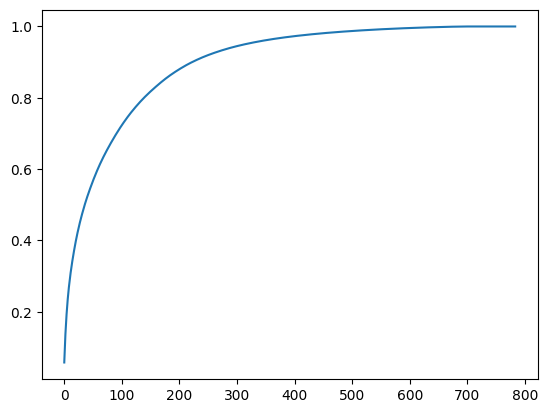

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# explained variance

# When not to use PCA

While Principal Component Analysis (PCA) is a powerful dimensionality reduction technique, there are situations where it may not be suitable or may not provide optimal results. Here are some cases when PCA may not be the best choice:

Non-Linear Relationships: PCA assumes a linear relationship between variables. If the underlying relationships in the data are non-linear, PCA may not capture the essential structures effectively. In such cases, nonlinear dimensionality reduction techniques, such as manifold learning methods (e.g., t-SNE, Isomap), may be more appropriate.

Preserving Interpretability: PCA creates linear combinations of the original features to form the principal components. While this transformation is useful for dimensionality reduction, it often results in a loss of interpretability. If preserving the interpretability of the original features is crucial for your analysis, alternative techniques that retain the original features, such as feature selection or feature extraction methods with explicit interpretations (e.g., factor analysis), might be more suitable.

Sparse or Sparse-Semantic Data: PCA works best when the data exhibits dense and continuous patterns. If the data is sparse, meaning most of the values are zeros or missing, PCA may not perform well. In such cases, specialized techniques for handling sparse data, such as sparse PCA or non-negative matrix factorization (NMF), could be more appropriate.

Outliers: PCA is sensitive to outliers in the data. Outliers can disproportionately influence the calculation of principal components, potentially leading to a distorted representation of the data. If the presence of outliers is a concern, it is advisable to either preprocess the data to handle outliers or consider robust dimensionality reduction techniques that are less affected by outliers.

Retaining Specific Features: PCA aims to capture the most significant variance in the data but may not prioritize preserving specific features that are important for your analysis. If you have domain knowledge and specific variables that you want to retain in the dimensionality reduction process, other methods such as feature selection or domain-specific techniques may be more appropriate.

Large Datasets: PCA can be computationally expensive for very large datasets. As the number of variables or samples increases, the computational and memory requirements of PCA grow. In such cases, approximate or incremental PCA methods can be used to handle large-scale datasets.

# LDA (Least Discriminant Analysis) 
Linear Discriminant Analysis (LDA) is one of the commonly used dimensionality reduction techniques in machine learning to solve more than two-class classification problems. It is also known as Normal Discriminant Analysis (NDA) or Discriminant Function Analysis (DFA).
It is good if data is linearly seperable.
It is a kind of linear transformation technique.
It takes into account class labels as well, thus making it supervised algorithm.


# Let us understand this by using the simple example:-
1. Imagine you have a bunch of pictures of different animals, like cats, dogs, and birds. Each picture has many features, such as the color, size, and shape of the animal.

2. Now, you want to find a way to represent these pictures using fewer features, so you can understand the differences between the animals better. This is where dimensionality reduction comes in.

3. LDA is a method that helps us reduce the number of features while still keeping the important information that helps us distinguish between different classes, like cats, dogs, and birds.

4. First, we need to gather some examples of the animals we want to classify, like pictures of cats, dogs, and birds. We also need to know which animal each picture belongs to (the class labels).

5. Next, we look at the features of the animals in the pictures, such as their color, size, and shape. LDA tries to find a new set of features that are good at separating the animals into their correct classes.

6. To do this, LDA calculates the average (mean) feature values for each class. For example, it finds the average color, size, and shape of all the cat pictures, and does the same for dogs and birds.

7. LDA also calculates the spread or variance of the feature values within each class. This tells us how much the feature values differ within each animal class. It helps LDA understand the differences between individual animals of the same class.

8. Now, LDA wants to find a set of features that makes the spread between different classes as large as possible, while keeping the spread within each class as small as possible. This means the new features should help us separate animals of different classes, but be similar for animals of the same class.

9. LDA achieves this by finding a direction (line) in the feature space that maximizes the differences between classes and minimizes the differences within each class. It's like drawing a line that best separates the animals based on their features.

10. Once LDA finds this line, it uses it to project or transform the original pictures onto a lower-dimensional space. This means we reduce the number of features in each picture but still keep the important information that helps us classify the animals correctly.

11. Finally, we can use these lower-dimensional representations of the pictures to classify new animals. LDA has helped us reduce the complexity of the pictures while preserving the important information that distinguishes one animal from another.

 

# **Let's look at the step by step implementation of LDA **
1. Calculate mean for each class and overall class.
2. Calculate within class co-variance matrix.
3. calculate between class covariance matrix.
4. calculate the eigen values and eigen matrix.
5. determine the LD function


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
# creating data for group 1 
v1=np.array([0,0])
cov_mat1=np.array([[1,0],[0,1]])
sample1=np.random.multivariate_normal(v1,cov_mat1,20)
df=pd.DataFrame(sample1,columns=['f1','f2'])
df['target']=1


# creating data for group 2
v2=np.array([1,1])
cov_mat2=np.array([[1,0],[0,1]])
sample1=np.random.multivariate_normal(v2,cov_mat2,20)
df1=pd.DataFrame(sample1,columns=['f1','f2'])
df1['target']=0

In [ ]:
df=df.append(df1,ignore_index=True)

<ipython-input-33-dc5f149d3fb3>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df=df.sample(40)

In [ ]:
df.head()

f1        f2  target
31  1.607114  0.408877       0
6   0.520090 -0.486973       1
8  -0.298498 -0.500064       1
20 -0.710519  1.397055       0
24  1.388728  2.342043       0

In [ ]:
import plotly.express as px
fig=px.scatter(df,x=df['f1'],y=df['f2'],color=df['target'].astype('str'))
fig.show()


In [ ]:

# step 1: Mean Centering
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df.iloc[:,0:2]=scaler.fit_transform(df.iloc[:,0:2])


In [ ]:
# step 2: create the within class scatter matrix s1
# scatter matrix class1
c1= df[(df['target']==0)]
c1_features= c1[['f1', 'f2']].values
c1_mean=np.mean(c1_features, axis=0)
c1_f=c1_features-c1_mean
num_rows, num_cols = c1_f.shape
result_sum = np.zeros((num_cols, num_cols))
for i in range(num_rows):
    row = c1_f[i]
    r= np.outer(row.T, row)
    result_sum+=r
s1=result_sum/c1.shape[0]

# scatter matrix class2
c2= df[(df['target']==0)]
c2_features= c2[['f1', 'f2']].values
c2_mean=np.mean(c2_features, axis=0)
c2_f=c2_features-c2_mean
num_rows, num_cols = c2_f.shape
result_sum = np.zeros((num_cols, num_cols))
for i in range(num_rows):
    row = c2_f[i]
    r= np.outer(row.T, row)
    result_sum+=r
s2=result_sum/c2.shape[0]

In [ ]:
# scatter matrix within class 
sw=s1+s2

In [ ]:
#scatter matrix between class
sb=np.outer(c1_mean.T,c2_mean)

In [ ]:
sw

array([[ 1.86471271, -0.21949276],
       [-0.21949276,  1.40657038]])

In [ ]:
sb

array([[0.43916091, 0.37050032],
       [0.37050032, 0.31257447]])

In [ ]:
#calculate eigen vector and eigen values
eig_values, eig_vectors=np.linalg.eig(np.dot(sw.T,sb))

In [ ]:
eig_values

array([ 1.09592264e+00, -5.55111512e-17])

In [ ]:
eig_vectors

array([[ 0.86658641, -0.64482855],
       [ 0.49902705,  0.76432725]])

In [ ]:
df.head()

f1        f2  target
31  1.023739 -0.192953       0
6  -0.051221 -1.012092       1
8  -0.860724 -1.024062       1
20 -1.268173  0.710607       0
24  0.807776  1.574676       0

In [ ]:
trsf_df=np.dot(df.iloc[:,0:2],eig_vectors.T)
df2=pd.DataFrame(trsf_df,columns=['LD1','LD2'])
df2['target']=df['target'].values
df2

LD1       LD2  target
0   1.011580  0.363394       0
1   0.608238 -0.799130       1
2  -0.085547 -1.212244       1
3  -1.557201 -0.089716       0
4  -0.315388  1.606670       0
5   0.707483 -0.118060       0
6  -1.957149 -0.002907       1
7   2.105185 -1.054496       0
8  -0.777854 -0.584688       1
9   0.522407 -1.551225       1
10 -1.085488 -0.008934       1
11 -0.222076 -1.440214       1
12  0.236411 -0.598974       1
13  1.096983 -1.256920       1
14  0.321419 -0.275202       1
15 -0.542243  0.720326       0
16  0.211722 -0.983490       1
17 -0.909640  0.125868       1
18 -0.814481  1.054231       0
19  0.766743 -1.164642       1
20  0.037651 -1.080130       1
21  0.435031  1.756514       0
22  1.427038  1.046328       0
23  0.420760  1.126533       0
24  2.627900  1.903835       0
25 -0.635551  0.009756       0
26 -0.035701  0.106809       0
27 -1.251198 -0.641114       1
28  0.548949 -1.571310       1
29  0.685079  1.533694       0
30 -1.020179  0.506509       0
31  0.099011 -1.057579       1
32  0.198345  0.710500       0
33  0.526780  1.469261       0
34 -0.468106 -0.355470       1
35 -1.431374  1.524135       0
36 -0.636929 -0.935173       1
37  0.435805  0.358402       0
38  0.046472  0.625858       0
39 -1.330885  0.232995       1

In [ ]:
# applying on MNIST dataset LDA

In [ ]:
m_df=pd.read_csv("train.csv")

In [ ]:
x=m_df.iloc[:,1:]
y=m_df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
x_lda = lda.fit_transform(x, y)



In [ ]:
lda.explained_variance_ratio_

array([0.24017978, 0.20277969, 0.1738551 , 0.10748714, 0.09554657,
       0.06815024, 0.05058414, 0.03448012, 0.02693722])

In [ ]:
np.cumsum(lda.explained_variance_ratio_)

array([0.24017978, 0.44295946, 0.61681456, 0.72430171, 0.81984827,
       0.88799852, 0.93858266, 0.97306278, 1.        ])

In [ ]:
print(lda.classes_)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
import plotly.express as px
fig=px.scatter_3d(x=x_lda[:,0],y=x_lda[:,1],z=x_lda[:,2],color=y.astype('str'))
fig.show()


# NMF(Non Negative Matrix Factorization)
This is a very strong algorithm which many applications. For example, it can be applied for Recommender Systems, for Collaborative Filtering for topic modelling and for dimensionality reduction.

In Python, it can work with sparse matrix where the only restriction is that the values should be non-negative.

The logic for Dimensionality Reduction is to take our m×n data and to decompose it into two matrices of m×features and features×n respectively. The features will be the reduced dimensions.
Non-Negative Matrix Factorization (NMF or NNMF) is also a linear dimensionality reduction technique that can be used to reduce the dimensionality of the feature matrix.

All dimensionality reduction techniques fall under the category of unsupervised machine learning in which we can reveal hidden patterns and important relationships in the data without requiring labels.

So, dimensionality reduction algorithms deal with unlabeled data. When training such an algorithm, the fit() method only needs the feature matrix, X as the input and it does not require the label column, y.

As its name implies, non-negative matrix factorization (NMF) needs the feature matrix to be non-negative.

Because of this non-negativity constraint, the usage of NMF is limited to data with non-negative values such as image data (pixel values always lie between 0 and 255, hence there are no negative values in image data!).

# MATHS BEHIND NMF
Non-negative matrix factorization (NMF) is the process of decomposing a non-negative feature matrix, V (nxp) into a product of two non-negative matrices called W (nxd) and H (dxp). All three matrices should contain non-negative elements.

The product of W and H matrices only gives an approximation to the matrix V. So, you should expect some information loss when applying NMF. Let's look into simpler version of it.

1. Imagine you have a matrix X with numbers arranged in rows and columns. Each number in the matrix represents a value of some kind. The goal of NMF is to find two new matrices, W and H, that can be multiplied together to approximate the original matrix X.

2. Matrix W contains basis vectors or prototypes, which are like building blocks for the data. Matrix H represents the coefficients or weights associated with those basis vectors.

3. To get the factorization, we want to minimize the difference between the original matrix X and the reconstructed matrix WH. We do this by finding the best values for W and H. This is achieved by an iterative process that minimizes a cost function, which measures the difference between X and WH.

4. One common cost function is the Euclidean distance, which calculates the squared difference between each element of X and its corresponding element in WH. The goal is to make this difference as small as possible.

5. To ensure that the factorization is non-negative, we constrain both W and H to be non-negative matrices. This constraint is important because it allows NMF to capture additive and non-negative parts-based representations of the data, making the factorization more interpretable.

6. To optimize the factorization, NMF uses an iterative algorithm called multiplicative update rules. This algorithm starts by randomly initializing the values of W and H, and then iteratively updates these values to minimize the cost function.

7. In each iteration, we update the values of W and H based on the relative contributions of the data X and the current approximation WH. These updates scale the current values of W and H in a way that reduces the difference between X and WH.

8. We continue these updates until we reach a point where the cost function no longer decreases significantly or a maximum number of iterations is reached. At this point, we have found the optimal values for W and H, and the factorization is complete.

9. By decomposing the original matrix X into W and H, NMF allows us to extract meaningful features or patterns from the data. These features can be used for various purposes, such as reducing the dimensionality of the data, clustering similar data points, or separating signals from noise.

Overall, NMF is a technique that helps us find lower-rank non-negative matrices that, when multiplied together, approximate the original data matrix. This approximation is achieved through an iterative process that minimizes the difference between the original data and the reconstructed data. The non-negativity constraint ensures that the factorization captures meaningful and interpretable patterns in the data.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df['target']=data['target']

In [ ]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [ ]:
import numpy as np

def nmf_dimensionality_reduction(X, num_components, num_iterations):
    num_samples, num_features = X.shape

    # Initialize W and H with random positive values
    W = np.random.rand(num_samples, num_components)
    H = np.random.rand(num_components, num_features)

    for iteration in range(num_iterations):
        # Update W
        numerator_w = X @ H.T
        denominator_w = W @ H @ H.T
        W =W*np.divide(numerator_w , denominator_w)


      # Update H
        numerator_h = W.T @ X
        denominator_h = W.T @ W @ H
        H =H* np.divide(numerator_h , denominator_h)

    # Reduce dimensionality by representing data using the coefficients in H
    reduced_data = W

    return reduced_data

# Example usage
# Assuming X is your dataset with shape (num_samples, num_features)
num_components = 3
num_iterations = 100
reduced_data = nmf_dimensionality_reduction(df.iloc[:,0:14], num_components, num_iterations)


<ipython-input-106-1d2fa1f26416>:20: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.



In [ ]:
reduced_data

0           1           2
0    132.471578   80.198905   83.362925
1     85.991078  183.667134   75.400391
2    153.203138   77.599801   90.113054
3    115.952635  130.677277  223.809130
4     91.979448   24.515118   84.231528
..          ...         ...         ...
173   79.264672   53.017074   84.575872
174   87.500919   52.987720   73.193785
175  114.370193    4.585118   96.375905
176   35.671271   84.554483  177.358165
177   58.595297   74.764115   38.168156

[178 rows x 3 columns]

In [ ]:
reduced_data['target']=df['target']

In [ ]:
reduced_data

0           1           2  target
0    132.471578   80.198905   83.362925       0
1     85.991078  183.667134   75.400391       0
2    153.203138   77.599801   90.113054       0
3    115.952635  130.677277  223.809130       0
4     91.979448   24.515118   84.231528       0
..          ...         ...         ...     ...
173   79.264672   53.017074   84.575872       2
174   87.500919   52.987720   73.193785       2
175  114.370193    4.585118   96.375905       2
176   35.671271   84.554483  177.358165       2
177   58.595297   74.764115   38.168156       2

[178 rows x 4 columns]

In [ ]:
import plotly.express as px
fig=px.scatter_3d(x=reduced_data.iloc[:,0],y=reduced_data.iloc[:,1],z=reduced_data.iloc[:,2],color=reduced_data['target'].astype('str'))
fig.show()


IMPLEMENTING MNIST DATASET USING SKLEARN LIBRARY NMF

In [107]:
x.shape

(42000, 784)

In [108]:
y.shape

(42000,)

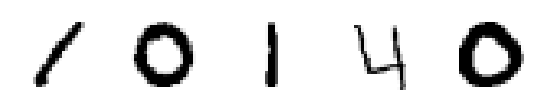

In [110]:
#visualizing
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(6.75, 1.5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x.iloc[i].values.reshape(28, 28), cmap="binary")
  ax.axis('off')

plt.show()

In [111]:
from sklearn.decomposition import NMF
# Taking d=9
nmf_model = NMF(n_components=9, init='random', random_state=0)
# W = transformed data matrix, x = original feature matrix
W = nmf_model.fit_transform(x)


# H = factorization matrix
H = nmf_model.components_

nmf_model.reconstruction_err_ #V-V'

#Here error is high as no of dimensions are 9 

293629.5717920661

In [113]:
print("V_shape:", x.shape)
print("W_shape:",W.shape)
print("H_shape", nmf_model.components_.shape)

V_shape: (42000, 784)
W_shape: (42000, 9)
H_shape (9, 784)


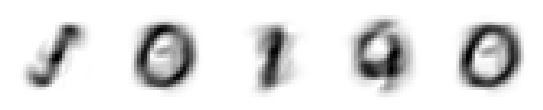

In [114]:
# visualize it
image_data_nmf_recovered = nmf_model.inverse_transform(W)# getting original from the transformed one

n = 5
plt.figure(figsize=(6.75, 1.5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(image_data_nmf_recovered[i, :].reshape(28, 28), cmap="binary")
  ax.axis('off')

plt.show()

In [ ]:
# increasing no of components till error is reduced making the loop of it:-
for i in range(10,780):
  nmf_model = NMF(n_components=i, init='random', random_state=0)
# W = transformed data matrix, x = original feature matrix
  W = nmf_model.fit_transform(x)
# H = factorization matrix
  H = nmf_model.components_
  print("For Components:-",i," error is:- ",nmf_model.reconstruction_err_) #V-V'


In [119]:
nmf_model = NMF(n_components=100, init='random', random_state=0)
# W = transformed data matrix, x = original feature matrix
W = nmf_model.fit_transform(x)
# H = factorization matrix
H = nmf_model.components_
print("For Components:- 100 error is:- ",nmf_model.reconstruction_err_) #V-V'

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



For Components:- 100 error is:-  135203.2434688026


In [ ]:
nmf_model = NMF(n_components=700, init='random', random_state=0)
# W = transformed data matrix, x = original feature matrix
W = nmf_model.fit_transform(x)
# H = factorization matrix
H = nmf_model.components_
print("For Components:- 700 error is:- ",nmf_model.reconstruction_err_) #V-V'